<a href="https://colab.research.google.com/github/chunyuan0221/3rd-ML100days/blob/master/Day090_color_histogram_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 作業目標
* 畫出 16 個 bin 的顏色直方圖,並嘗試回答每個 channel 在 [16, 32] 這個 bin 中有多少個 pixel？
* 確保同學知道如何改變參數以及理解 cv2.calcHist 這個函數輸出的資料含義

In [1]:
import os
import keras
import cv2 # 載入 cv2 套件
from google.colab import patches  # 有些cv2指令需要用這個來做才不會錯誤
import matplotlib.pyplot as plt
%matplotlib inline
#os.environ["CUDA_VISIBLE_DEVICES"] = "" # 使用 CPU
train, test = keras.datasets.cifar10.load_data()

Using TensorFlow backend.


170500096/170498071 [==============================] - 2s 0us/step


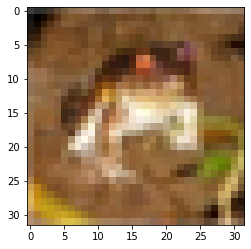

In [2]:
image = train[0][0] # 讀取圖片
plt.imshow(image)
plt.show()

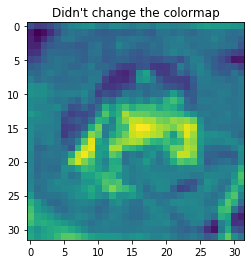

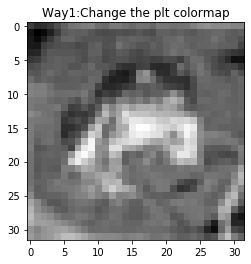

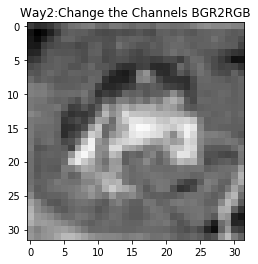

In [9]:
# 把彩色的圖片轉為灰度圖，cv2在轉換時換以BGR座儲存，需要再做轉換或者在plt.imshow()中加入cmap='gray'
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray)
plt.title("Didn't change the colormap")
plt.show()

gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray')
plt.title('Way1:Change the plt colormap')
plt.show()

image_RGB = cv2.cvtColor(gray, cv2.COLOR_BGR2RGB)
plt.imshow(image_RGB)
plt.title('Way2:Change the Channels BGR2RGB')
plt.show()

通過調用 __cv2.calcHist(images, channels, mask, histSize, ranges)__ 函數來得到統計後的直方圖值

* images (list of array)：要分析的圖片
* channels：產生的直方圖類型。例：[0]→灰度圖，[0, 1, 2]→RGB三色。
* mask：optional，若有提供則僅計算 mask 部份的直方圖。
* histSize：要切分的像素強度值範圍，預設為256。每個channel皆可指定一個範圍。例如，[32,32,32] 表示RGB三個channels皆切分為32區段。
* ranges：像素的範圍，預設為[0,256]，表示<256。

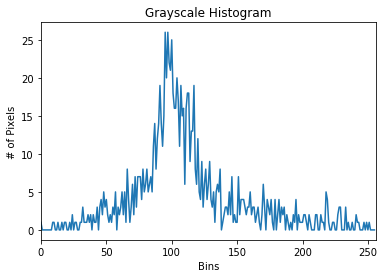

In [11]:
# 調用 cv2.calcHist 函數，回傳值就是 histogram
hist = cv2.calcHist([gray], [0], None, [256], [0, 256])
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])
plt.show()

In [12]:
print("hist shape:", hist.shape, "\n直方圖中前兩個值:", hist[:2]) # 1 表示該灰度圖中，只有 1 個 pixel 的值是 0，0 個 pixel 的值是 1

hist shape: (256, 1) 
直方圖中前兩個值: [[1.]
 [0.]]


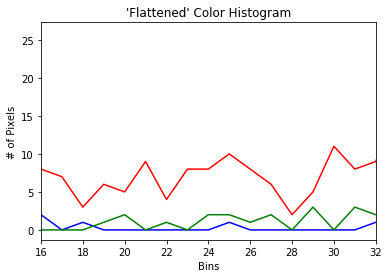

{'b': 5, 'g': 19, 'r': 117}

In [15]:
import numpy as np

chans = cv2.split(image) # 把圖像的 3 個 channel 切分出來
colors = ("b", "g", "r")
pixel_num = {} # 分別儲存圖片在RGB channel中介於(16~32)的值有幾個
plt.figure()
plt.title("'Flattened' Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")

# 對於所有 channel
for (chan, color) in zip(chans, colors):
    pixel_where = np.where((chan>=16) & (chan<=32))
    pixel_num[f'{color}'] = len(pixel_where[0])
    # 計算該 channel 的直方圖
    hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
 
    # 畫出該 channel 的直方圖
    plt.plot(hist, color = color)
    plt.xlim([16, 32])
plt.show()

pixel_num

### Result
- 畫出 16 個 bin 的顏色直方圖,並嘗試回答每個 channel 在 [16, 32] 這個 bin 中有多少個 pixel?
***
- 透過np.where可以找到R、G、B channel在[16, 32]範圍中分別為:
    - R : 117
    - G : 19
    - B : 5